In [ ]:
##################################################
##### SETUP THE ENV AND IMPORT ALL LIBRARIES #####
##################################################

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import scipy
import matplotlib.pyplot as plt
import matplotlib
import seaborn
!pip install scikit-learn==0.24.2

In [ ]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [ ]:
%cd drive/MyDrive/A1Interviewanal

/content/drive/MyDrive/A1Interviewanal


In [ ]:
##############################################
##### Import the data set and explore it #####
##############################################

In [ ]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df1.shape

(13320, 9)

In [ ]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [ ]:
#################################
##### HANDLE NA/NULL VALUES #####
#################################

In [ ]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df1 = df1.fillna(df1.median())

In [ ]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [ ]:
df1 = df1.drop(['society'],axis='columns')

In [ ]:
df1.isnull().sum()


area_type        0
availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [ ]:
df1 = df1.dropna()

In [ ]:
df1.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [ ]:
###################################
##### HANDLE THE SIZE FEATURE #####
###################################

In [ ]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df1['bedroom_size'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
df1 = df1.drop(['size'], axis='columns')

In [ ]:
df1['bedroom_size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
###################################
##### HANDLE THE SQFT FEATURE #####
###################################

In [ ]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [ ]:
df1[~df1['total_sqft'].apply(is_float)].head(30)

,area_type,availability,location,total_sqft,bath,balcony,price,bedroom_size
30,Super built-up Area,19-Dec,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Built-up Area,18-Oct,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Super built-up Area,18-Mar,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,19-Dec,Devanahalli,1520 - 1740,2.0,2.0,74.820,3
410,Super built-up Area,Ready To Move,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


In [ ]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
df1['total_sqft'] = df1['total_sqft'].apply(convert_sqft_to_num)

In [ ]:
df1.describe()

,total_sqft,bath,balcony,price,bedroom_size
count,13257.000000,13303.000000,13303.000000,13303.000000,13303.000000
mean,1558.809175,2.689619,1.602872,112.584033,2.803728
std,1238.478935,1.339393,0.803455,148.993820,1.295022
min,1.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,50.000000,2.000000
50%,1275.000000,2.000000,2.000000,72.000000,3.000000
75%,1680.000000,3.000000,2.000000,120.000000,3.000000
max,52272.000000,40.000000,3.000000,3600.000000,43.000000


In [ ]:
df1 = df1.dropna()
df1.isnull().sum()

area_type       0
availability    0
location        0
total_sqft      0
bath            0
balcony         0
price           0
bedroom_size    0
dtype: int64

In [ ]:
df2 = df1.copy()

In [ ]:
####################################
##### BASIC FUNCTIONALITY TO R #####
####################################

In [ ]:
df2['price_per_sqft'] = df2['price']*100000/df2['total_sqft']

In [ ]:
df2.location = df2.location.apply(lambda x: x.strip())
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield              538
Sarjapur  Road          397
Electronic City         304
Kanakpura Road          271
Thanisandra             236
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1287, dtype: int64

In [ ]:
location_10 = location_stats[location_stats<=10]
len(location_10)

1047

In [ ]:
df2.location = df2.location.apply(lambda x: 'other' if x in location_10 else x)

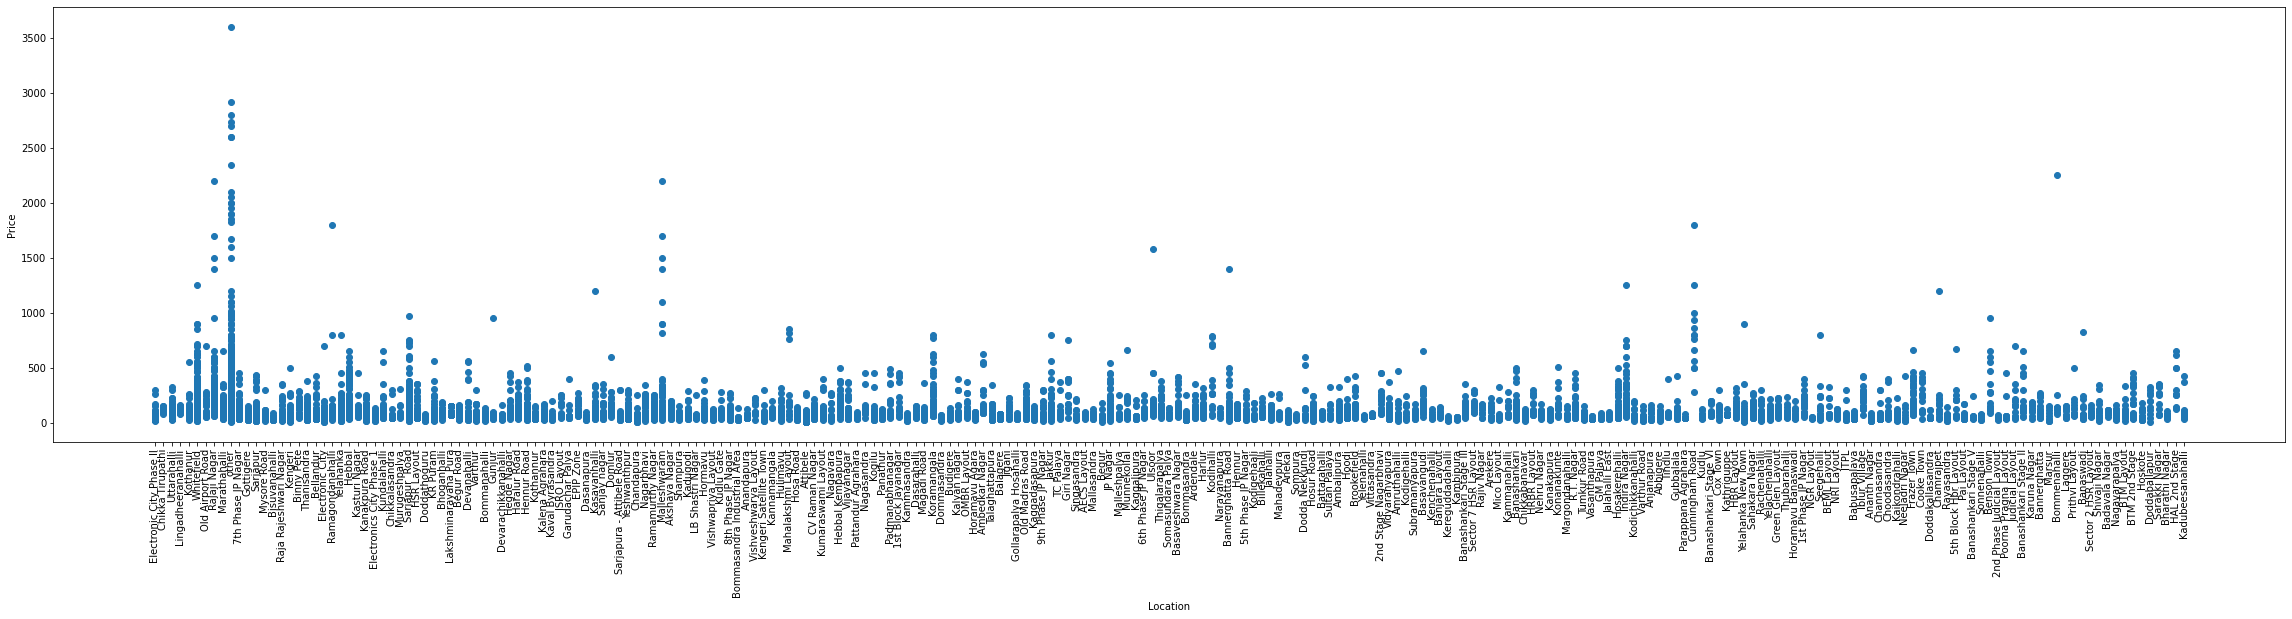

In [ ]:
fig, ax = plt.subplots(figsize=(40,8))
plt.xticks(rotation=90)
ax.scatter(df2.location, df2.price)
ax.set_xlabel('Location')
ax.set_ylabel('Price')
plt.show()

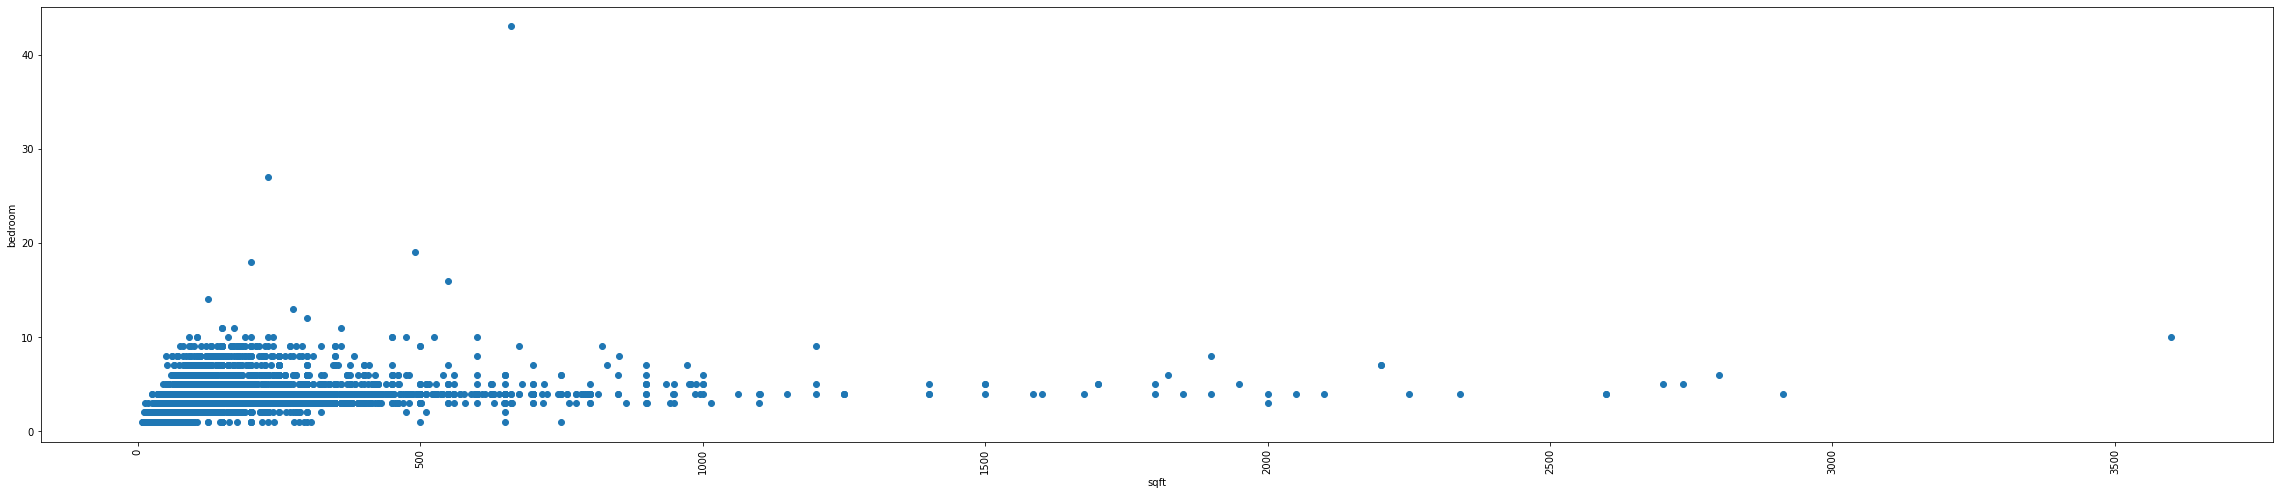

In [ ]:
fig, ax = plt.subplots(figsize=(40,8))
plt.xticks(rotation=90)
ax.scatter(df2.price, df2.bedroom_size)
ax.set_xlabel('sqft')
ax.set_ylabel('bedroom')
plt.show()

In [ ]:
def remove_pps_out(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price)
    st = np.std(subdf.price)
    reduced_df = subdf[(subdf.price>(m-st))&(subdf.price<=(m+st))]
    df_out = pd.concat([df_out,reduced_df], ignore_index=True)
  return df_out

In [ ]:
df6 = remove_pps_out(df2)
df6.shape

(11396, 9)

In [ ]:
df6['bedrooms'] = df6['bedroom_size']
df6 = df6.drop(['bedroom_size'], axis =  'columns')
df6['sqft_price'] = df6.total_sqft/df6.bedrooms
df6['price_per_bedroom'] = df6.price/df6.bedrooms

In [ ]:
df6 = df6[~((df6.bedrooms+1) < df6.bath)]
df6 = df6[~(df6.bedrooms < df6.balcony)]

In [ ]:
size = df6['total_sqft'].quantile(0.99)
value = df6['price'].quantile(0.99)


In [ ]:
df6 = df6[~(df6.total_sqft >size)]
df6 = df6[~(df6.price >value)]

In [ ]:
size = df6['total_sqft'].quantile(0.01)
value = df6['price'].quantile(0.01)

In [ ]:
df6 = df6[~(df6.total_sqft<size)]
df6 = df6[~(df6.price<value)]

In [ ]:
def remove_bedrooms_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bedrooms_stats = {}
    for bedrooms, bedrooms_df in location_df.groupby('bedrooms'):
      bedrooms_stats[bedrooms]= {
          'mean': np.mean(bedrooms_df.sqft_price),
          'std': np.std(bedrooms_df.sqft_price),
          'count': bedrooms_df.shape[0]
      }
    for bedrooms, bedrooms_df in location_df.groupby('bedrooms'):
      stats = bedrooms_stats.get(bedrooms-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bedrooms_df[bedrooms_df.sqft_price<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')

df14 = remove_bedrooms_outliers(df6)

In [ ]:
df14 = df14[~(df14.location == 'other')]

In [ ]:
dum = pd.get_dummies(df14.location)
dum1 = pd.get_dummies(df14.area_type)
df7= pd.concat([df14, dum], axis='columns')
df7= pd.concat([df7, dum1], axis='columns')

In [ ]:
df7 = df7.drop(['availability', 'location'], axis='columns')

In [ ]:
columns
import json

with open("columns", "w") as fp:
    json.dump(fp,columns) 

In [ ]:
columns

In [ ]:
with open('json.txt', 'w') as f:
    f.writelines(js)

In [ ]:
columns = X.columns

In [ ]:
l = []
for i in columns:
  l.append(i)

js = {}
js['data columns'] = l
js


In [ ]:
js

In [ ]:
import json
with open('jsondata.json', 'w') as f:
    json.dump(js, f)

In [ ]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import  LinearRegression

X = df7.drop(['price','sqft_price', 'area_type', 'price_per_bedroom', 'price_per_sqft'], axis='columns')
y = df7.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.791009999035153

In [ ]:
import pickle
with open('model.pickle', 'wb') as file:
    pickle.dump(lr_clf, file)

In [ ]:
!pip install pickle5

In [ ]:
import pickle as pickle
with open('model_p') as f:
  f.encode('utf-8')
  load = pickle.load(f)

print(load)



In [ ]:
import pickle
with open("./model.pickle", 'rb') as f:
        __model =  pickle.load(f)

In [ ]:

tr = X[X.index == 2000]
__model.predict(tr)

array([138.31622314])

In [ ]:
tr


,total_sqft,bath,balcony,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,...,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area,Super built-up Area
2000,1650.0,3.0,1.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df14[df14.index == 2000]

,area_type,availability,location,total_sqft,bath,balcony,price,price_per_sqft,bedrooms,sqft_price,price_per_bedroom
2000,Built-up Area,Ready To Move,Domlur,1650.0,3.0,1.0,180.0,10909.090909,3,550.0,60.0


In [ ]:
def plot_scatter_chart(df, location):
  bedrooms1 = df[(df.location == location)&(df.bedrooms==1)]
  bedrooms2 = df[(df.location == location)&(df.bedrooms==2)]
  bedrooms3 = df[(df.location == location)&(df.bedrooms==3)]
  bedrooms4 = df[(df.location == location)&(df.bedrooms==4)]
  bedrooms5 = df[(df.location == location)&(df.bedrooms==5)]
  bedrooms6 = df[(df.location == location)&(df.bedrooms==6)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bedrooms1.total_sqft, bedrooms1.sqft_price, marker='^', color='red', label='1 bedroom1', s=50)
  plt.scatter(bedrooms2.total_sqft, bedrooms2.sqft_price, color='blue', label='2 bedrooms', s=50)
  plt.scatter(bedrooms3.total_sqft, bedrooms3.sqft_price, marker='+', color='green', label='3 bedrooms', s=50)
  plt.scatter(bedrooms4.total_sqft, bedrooms4.sqft_price, marker=',', color='black', label='4 bedrooms', s=50)
  plt.scatter(bedrooms5.total_sqft, bedrooms5.sqft_price, marker='*', color='yellow', label='5 bedrooms', s=50)
  plt.scatter(bedrooms6.total_sqft, bedrooms6.sqft_price, marker='>', color='orange', label='6 bedrooms', s=50)
  plt.xlabel('total square feet area')
  plt.xlabel('Price')
  plt.title(location)
  plt.legend()

plot_scatter_chart(df14, '8th Phase JP Nagar')

In [ ]:
static = {}

static[1] = {
    'hello': 1
}

In [ ]:
static.get(1)